Titanic

Author: Bo Rong

Date: Oct 6 2017

Introduction
This analysis is based on Titanic Data. The database contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. 

The questions I would like to answer throughout my analysys are :
1. Who were the passengers on the Titanic? 
2. What factors made people more likely to survive?

Outline:

1.Import Primary Moduls

2.Missing value

3.Relations between features

4.Exploration

5.Conclusion




1.Import Primary Moduls

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
titanic=pd.read_csv("/Users/brong/Downloads/titanic-data.csv")


In [57]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Totally we have 891 passengers' information.

In [59]:
#Check if any missing value in the datafrme
titanic.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

177 passengers don't have age information, 687 don't know Cabin and 2 don't have Embarked. 


In [60]:
#drop all rows with missing age values
titanic_age= titanic[np.isfinite(titanic['Age'])]

In [61]:
#double check no more missing values on age in the new dataset
titanic_age.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          529
Embarked         2
dtype: int64

In [62]:
# Check if data types are correct
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

3.Relations between features

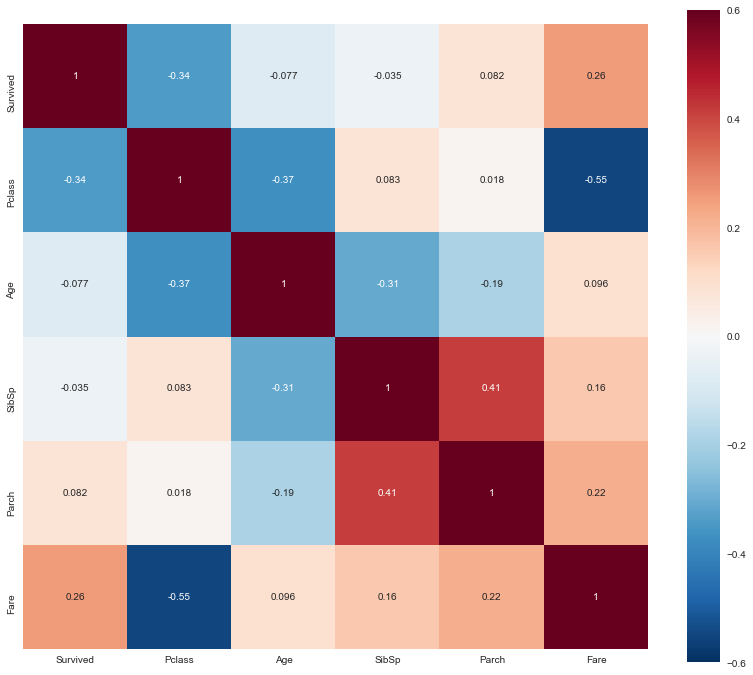

In [63]:
#correlation matrix for each numerical variable with all the other numerical variables
plt.figure(figsize=(14,12))
foo = sns.heatmap(titanic.drop('PassengerId',axis=1).corr(), vmax=0.6, square=True, annot=True)

Pclass is correlated with Fare and SibSp and Parch are weakly correlated.

4.Exploration

In [64]:
#number of dead
num_dead=len(titanic[titanic.Survived==0])
num_dead

549

In [65]:
#number of survived
num_sur=len(titanic[titanic.Survived==1])
num_sur

342

549 passengers dead and 342 survived.

In [66]:
#subset of male and female 
num_male=len(titanic[titanic.Sex=='male'])
male_sur=len(titanic[(titanic.Sex=='male')&(titanic.Survived==1)])
num_female=len(titanic[titanic.Sex=='female'])
female_sur=len(titanic[(titanic.Sex=='female')&(titanic.Survived==1)])

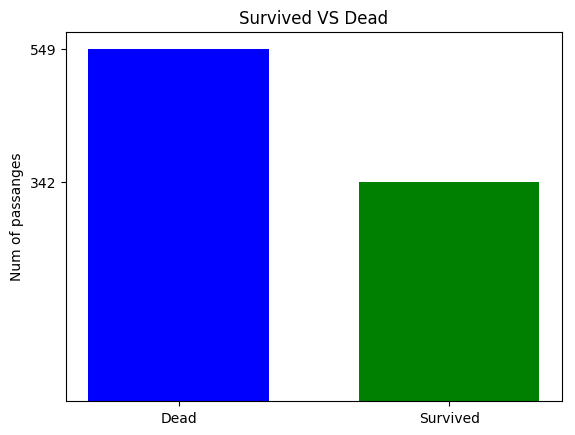

In [67]:
#Barplot for dead and survived
y = [num_dead, num_sur]
N = len(y)
x =  np.arange(N)
width = 1/1.5
colors=['b','g']
plt.rcdefaults()
fig, ax = plt.subplots()
plt.bar(x, y, width, color=colors)
ax.set_xticks(x)
ax.set_xticklabels(['Dead','Survived'])
ax.set_yticks(y)
ax.set_ylabel('Num of passanges')
ax.set_title('Survived VS Dead')
plt.show()

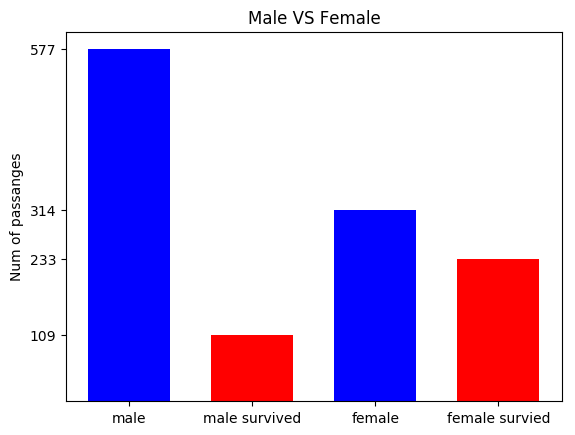

In [68]:
#Barplot for male and female survived information
y = [num_male,male_sur,num_female,female_sur]
N = len(y)
x = np.arange(len(y))
width = 1/1.5
colors=['b','r','b','r']
plt.rcdefaults()
fig, ax = plt.subplots()
plt.bar(x, y, width, color=colors)
ax.set_xticks(x)
ax.set_xticklabels(['male','male survived','female','female survied'])
ax.set_yticks(y)
ax.set_ylabel('Num of passanges')
ax.set_title('Male VS Female')
plt.show()

Based on the plot above, females are more likely to survive.


In order to plot the next Two histograms of age, I will ues the new dataset: titanic_age
make sure no missing values on age.

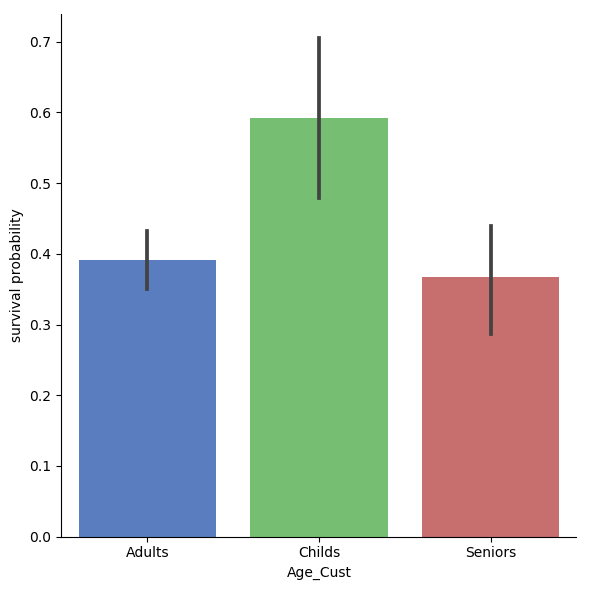

In [69]:
#Create a new column named Age_Cust,which convert age to groups.
warnings.filterwarnings(action="ignore")
titanic1= titanic.loc[titanic['Age'].notnull()]
titanic1['Age_Cust'] = pd.cut(titanic1['Age'], bins=[0,13,40,90], labels=['Childs','Adults','Seniors'])
# Draw a nested barplot to show survival for age 
g = sns.factorplot(x="Age_Cust", y="Survived", data=titanic1,
                   size=6, kind="bar", palette="muted")
g.set_ylabels("survival probability")
plt.show()

Childs has more chance to survive.

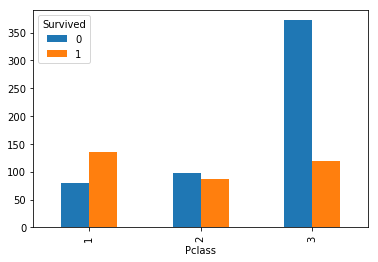

In [70]:
#Barplot for Pclass survive information
%matplotlib inline 
pl=titanic.pivot_table('PassengerId','Pclass', 'Survived', 'count').plot(kind='bar')


In [71]:
#class survived rate
titanic['Survived'].groupby(titanic['Pclass']).mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

It's easy to see that survived rate of class 1 > class 2 > class 3. Besides, class 1 also has the largest number of
survivers.

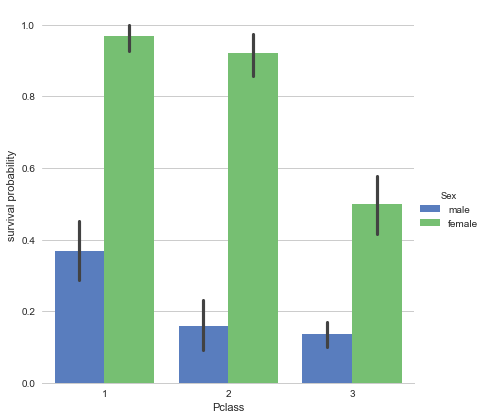

In [72]:
sns.set(style="whitegrid")

# Draw a nested barplot to show survival for class and sex
g = sns.factorplot(x="Pclass", y="Survived", hue="Sex", data=titanic,
                   size=6, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("survival probability")
plt.show()

In [73]:
#Calculate the number of survivors have relative or not
sur_have_relative=titanic[((titanic.SibSp!=0)|(titanic.Parch!=0))&(titanic.Survived==1)]
num_sur_have_relative=len(sur_have_relative)

In [74]:
num_sur_have_relative

179

Among survivors, there are 179 passengers have relatives.

In [75]:
sur_nothave_relative=titanic[(titanic.SibSp==0)&(titanic.Parch==0)&(titanic.Survived==1)]
num_sur_nothave_relative=len(sur_nothave_relative)

In [76]:
num_sur_nothave_relative

163

Among survivors, there are 163 passengers have relatives.

The number of survivers who have relative is closed to the number of survivers who don't have relative. Thus, Alone or
has relative is not a factor.

5.Conclusion

looking at the titanic data we see that we can split it into specific groups based on age, gender, classes and so on.  
Females have more chance to survive based on the result. Since there are many age information missing, we can not just say age is a key factor which effect on survival rate or not. Based on the non-null data set, childs have more change to survive.And also class 1 passengers are more likely to survive.

References

Bojose, https://www.kaggle.com/datacleaner/titanic

http://seaborn.pydata.org/examples/factorplot_bars.html